In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace
from geomstats.visualization import KendallSphere

import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.spd_matrices import SPDMatrices
from geomstats.geometry.lie_group import MatrixLieGroup


import numpy as np

from geomstats.learning import kmeans as km
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

from scipy.stats import multivariate_normal
import ot

In [ ]:
d=2
space = Hypersphere(d)

tpca = TangentPCA(space=space, n_components=d)

In [227]:
# Randomly generate a reference point p
p = space.random_point()

# Randomly generate d points in space - not sure why, but only using d points doesn't produce d orthogonal tangent vectors
X = np.array([space.random_point() for i in range(d+1)])

# Generate reference frame given p and X
F = tpca.fit(X, base_point=p).components_

# Check that tangent vectors in reference frame are orthogonal to reference point
print(F@p)

#Check that the tangent vectors are unit length
print([np.linalg.norm(f) for f in F])

# extend reference frame to random point m in space
m = space.random_point()
F_m = space.metric.parallel_transport(F,p, end_point=m)

[-8.96844440e-17  1.96746208e-16]
[1.0000000000000002, 0.9999999999999999]


In [208]:
X = np.array([space.random_point() for i in range(d)])
f0 = np.linalg.qr(space.metric.log(X,base_point=p).T)[0]
f0.T@f0




array([[-0.19323926, -0.36516958],
       [ 0.87413765, -0.48559055],
       [-0.44558047, -0.79426255]])

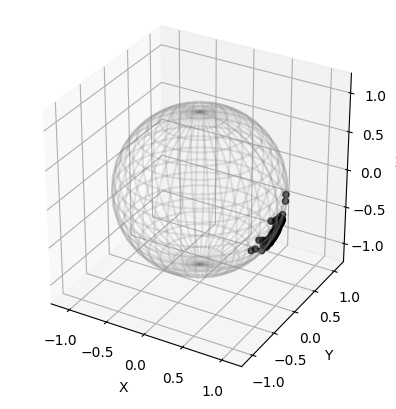

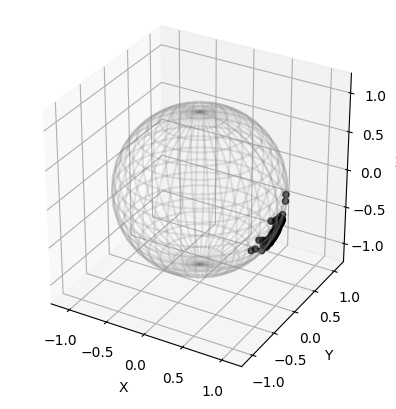

In [ ]:
#generate data Y from wrapped Gaussian WG(m,Sigma) on space, where Sigma is identified in terms of (p,F)
Sym_d_plus = SPDMatrices(d)

m = space.random_point()
Sigma = Sym_d_plus.random_point()

#generate random Gaussian data from N(0,Sigma)
w = multivariate_normal.rvs(np.zeros(d), Sigma, 100)/5

#Method 1: Generate in reference space, then parallel transport to target tangent space
#Parallel transport data to T_m(M), Exponential map it to sphere
Y1 = space.metric.exp(space.metric.parallel_transport(w@F,p, end_point=m),m)

#Method 2: Generate in target tangent space, using moving frame
#calculate moving frame at m
F_m = space.metric.parallel_transport(F,p, end_point=m)
#Parallel transport data to T_m(M), Exponential map it to sphere
Y2 = space.metric.exp(w@F_m,m)

#Plot data
visualization.plot(Y1, space="S2", color="black", alpha=0.7, label="Data points")
plt.show()

visualization.plot(Y2, space="S2", color="black", alpha=0.7, label="Data points")
plt.show()
